Well I have finally 'finished'. For the first part I got a period of ~630 days, based on the frequency I determined.

For the main part of the lab we had to determine the period of the variable star in question (to the best of our abilities). To do this I used astroalign (which I had to install). After allowing astroalign to align the images, we can move onto the aperture photometry, using circle apertures. Use aperture photometry to get counts for each star I used the calibration stars to account for the changes in brightness in RZ Sge. Now plot the flux from RZ Sge vs the modified Julian Date from the header! I got a period off from the expected value. my_period = ~.003 days vs REAL_period = ~.068 days.

In [18]:
import numpy as np
import scipy as scy
import matplotlib.pyplot as plt
import glob
import os
from astropy.nddata import CCDData
from astropy.visualization import hist
import ccdproc as ccdp
from astropy.stats import mad_std
from astropy.stats import sigma_clipped_stats
from astropy.io import fits
#import photutils
#from photutils import IterativelySubtractedPSFPhotometry, aperture_photometry
from ccdproc import CCDData, trim_image, subtract_bias, subtract_dark, flat_correct, Combiner


from scipy.ndimage import interpolation as interp
from astropy.timeseries import LombScargle
import skimage
import astroalign as aa

In [154]:
lc = np.genfromtxt('LightCurve3.dat', names = True)
t = lc['date']
mag = lc['bmag']
err = lc['err']

stars = ccdp.CCDData.read('rzsge/rzsge_0.fits', unit='adu')

INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


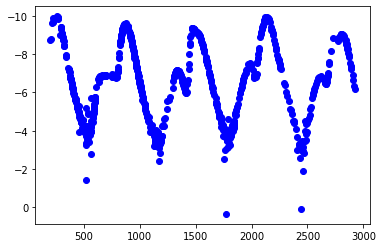

In [122]:
plt.plot(t, mag, 'bo')
plt.gca().invert_yaxis()

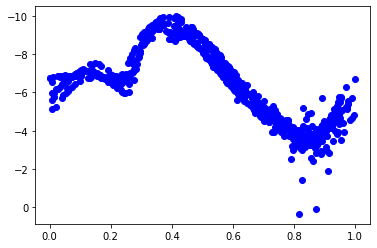

In [123]:
period = 630
plt.plot((t % period)/period, mag, 'bo')
plt.gca().invert_yaxis()

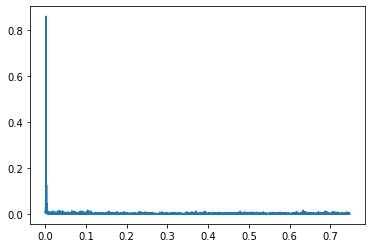

In [184]:
freq, power = LombScargle(t,mag).autopower() 
per = 1/freq[np.argmax(power)]
plt.plot(freq,power)

I'd say the period is ~ 630 days

In [16]:
rz1 = CCDData.read('rzsge/rzsge_1.fits')
rz2 = CCDData.read('rzsge/rzsge_2.fits')
rz3 = CCDData.read('rzsge/rzsge_3.fits')
rz4 = CCDData.read('rzsge/rzsge_4.fits')
rz5 = CCDData.read('rzsge/rzsge_5.fits')
rz6 = CCDData.read('rzsge/rzsge_6.fits')
rz7 = CCDData.read('rzsge/rzsge_7.fits')
rz8 = CCDData.read('rzsge/rzsge_8.fits')
rz9 = CCDData.read('rzsge/rzsge_9.fits')
rz10 = CCDData.read('rzsge/rzsge_10.fits')
rz11 = CCDData.read('rzsge/rzsge_11.fits')
rz12 = CCDData.read('rzsge/rzsge_12.fits')
rz13 = CCDData.read('rzsge/rzsge_13.fits')
rz14 = CCDData.read('rzsge/rzsge_14.fits')
rz15 = CCDData.read('rzsge/rzsge_15.fits')
rz16 = CCDData.read('rzsge/rzsge_16.fits')
rz17 = CCDData.read('rzsge/rzsge_17.fits')
rz18 = CCDData.read('rzsge/rzsge_18.fits')
rz19 = CCDData.read('rzsge/rzsge_19.fits')
rz20 = CCDData.read('rzsge/rzsge_20.fits')
rz21 = CCDData.read('rzsge/rzsge_21.fits')
rz22 = CCDData.read('rzsge/rzsge_22.fits')
rz23 = CCDData.read('rzsge/rzsge_23.fits')
rz24 = CCDData.read('rzsge/rzsge_24.fits')
rz25 = CCDData.read('rzsge/rzsge_25.fits')
rz26 = CCDData.read('rzsge/rzsge_26.fits')
rz27 = CCDData.read('rzsge/rzsge_27.fits')
rz28 = CCDData.read('rzsge/rzsge_28.fits')
rz29 = CCDData.read('rzsge/rzsge_29.fits')
rz30 = CCDData.read('rzsge/rzsge_30.fits')
rz31 = CCDData.read('rzsge/rzsge_31.fits')
rz32 = CCDData.read('rzsge/rzsge_32.fits')
rz33 = CCDData.read('rzsge/rzsge_33.fits')
rz34 = CCDData.read('rzsge/rzsge_34.fits')
#rz35 = CCDData.read('rzsge/rzsge_35.fits')

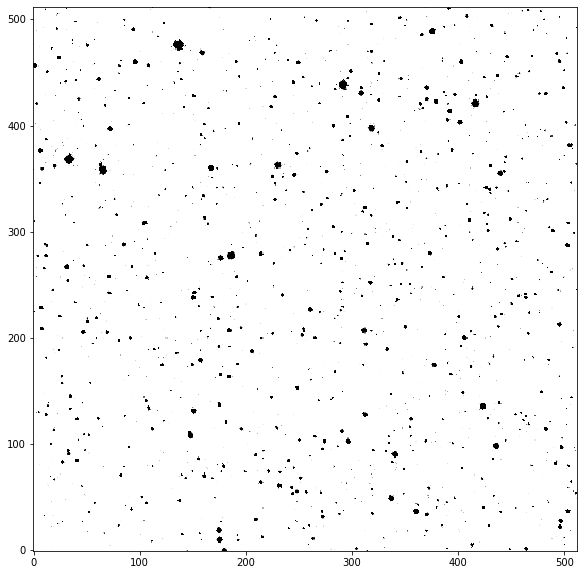

In [125]:
fig, ax = plt.subplots(figsize = (10,10))
plt.imshow(rz1, cmap = 'Greys', vmin = 40, vmax = 60)
plt.gca().invert_yaxis()

In [126]:
mean, median, std = sigma_clipped_stats(rz3.data)

In [127]:
DAO = photutils.detection.DAOStarFinder(threshold = 1750 * std, fwhm = 3.0)
sources = DAO(rz3.data - median)

sources

id,xcentroid,ycentroid,sharpness,roundness1,roundness2,npix,sky,peak,flux,mag
int64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64
1,35.798429662272234,367.33473234256866,0.6464012120769428,-0.2408265117617621,-0.06105352136422209,25,0.0,50957.322742900156,1.6248465086868231,-0.5270308539352695
2,293.55123545942143,437.0754564173344,0.6315480259173648,-0.29852156709525784,-0.232920594128753,25,0.0,38407.23763516281,1.2417086993178432,-0.23504930941396812
3,138.4566532778382,474.7051773033926,0.5803785079880631,0.1317498669781968,-0.2246428020152927,25,0.0,50971.64970557875,1.68819593978844,-0.568557128577204


In [128]:
source_points = np.array([sources['xcentroid'], sources['ycentroid']])
print(source_points.shape)

(2, 3)


In [129]:
positions = np.transpose(source_points)

In [130]:
apertures = photutils.CircularAperture((282,305), r = 5.)
fixed_apertures = photutils.CircularAperture(positions, r=5.)

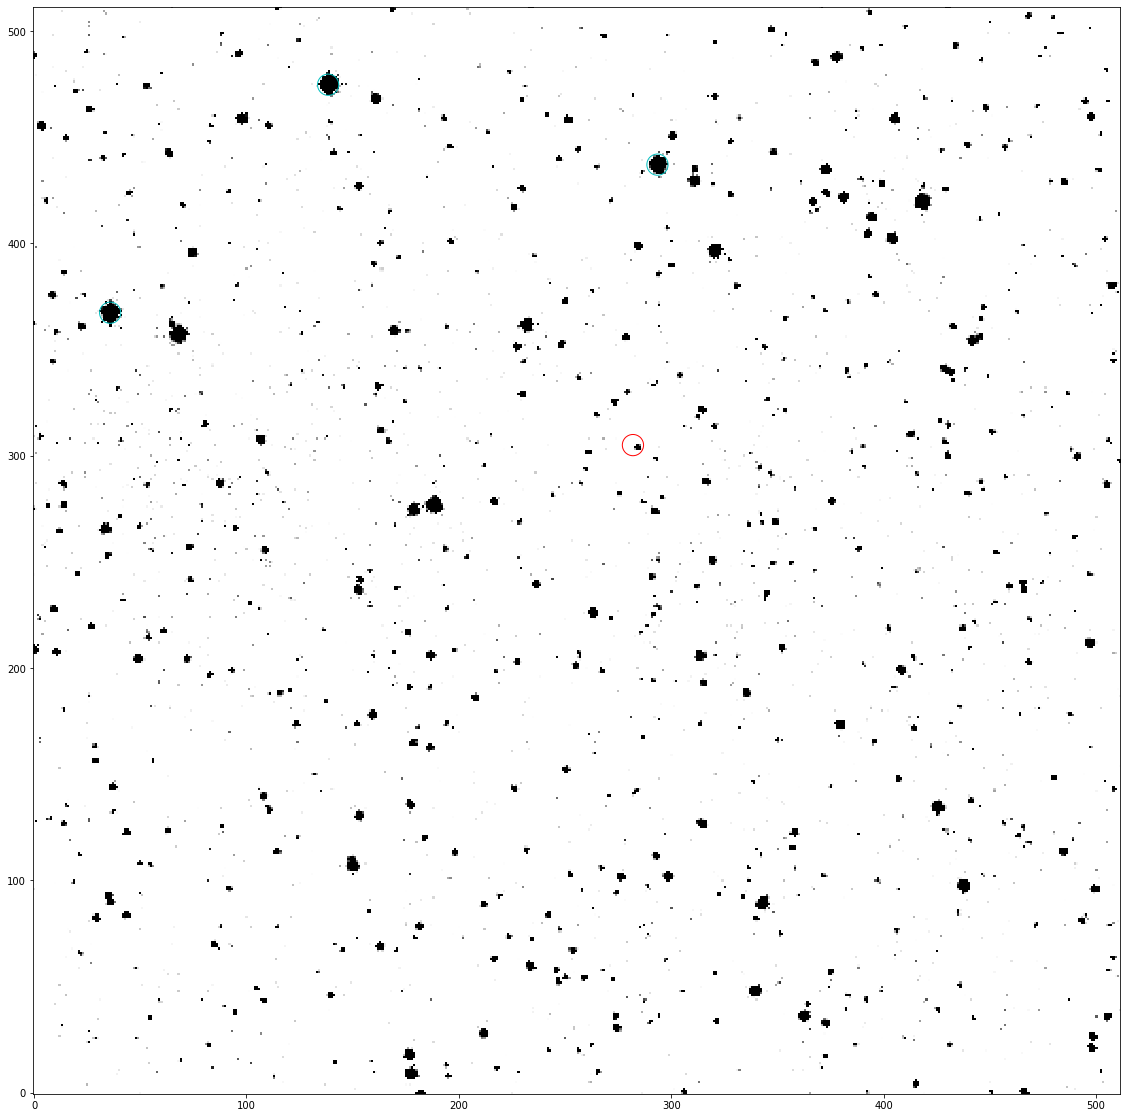

In [132]:
fig, ax = plt.subplots(figsize = (20,20))

ax.imshow(rz3.data, cmap = 'Greys', origin = 'lower', vmin = 40, vmax = 60)
apertures.plot(color = 'r', lw=1, alpha = 0.99)
fixed_apertures.plot(color = 'c', lw=1, alpha = 0.99)

In [19]:
aligned_image_01, footprint = aa.register(np.float64(rz2.data), np.float64(rz1.data))
time = np.zeros(34)
for n in range(34):
    image_n = ccdp.CCDData.read('rzsge/rzsge_' + str(n) + '.fits', unit='adu')
    aligned_image_n, footprint = aa.register(np.float64(image_n.data), np.float64(rz1.data))
    time[n] = image_n.header['MJD']
    #print(time)

INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader inste

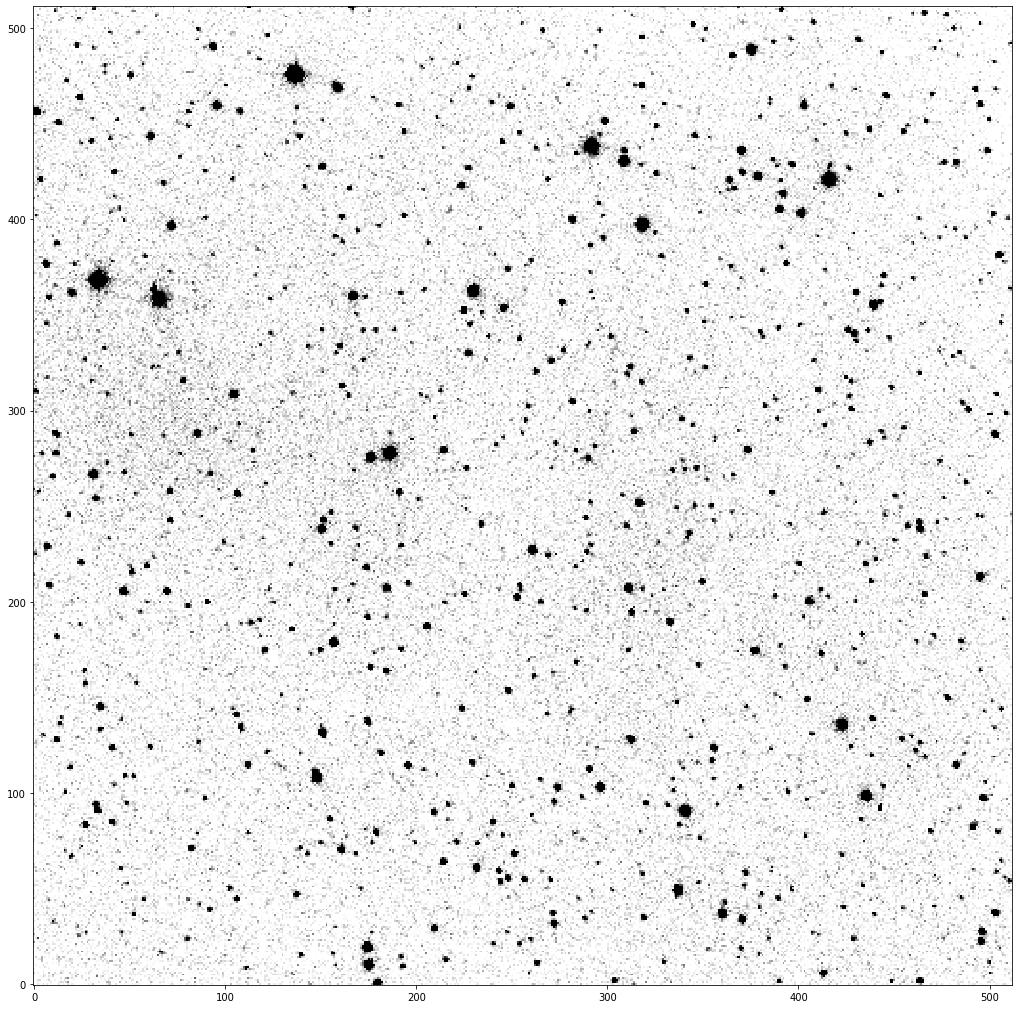

In [141]:
fig, ax = plt.subplots(1,1, figsize = (18,18))
ax.imshow(rz1.data + aligned_image_01, Cmap = 'Greys', vmin = 0, vmax=100)
ax.invert_yaxis() #they align!!! (pretty well)

In [ ]:
stars = ccdp.CCDData.read('variable/RZsge/rzsge_0.fits', unit='adu')
mean, median, std = sigma_clipped_stats(stars, sigma=3.0, maxiters=5)
daofind = DAOStarFinder(fwhm=3.0, threshold=420*std)
sources = daofind(stars - median)
print(sources, sources['xcentroid'], sources['ycentroid'])

In [146]:
stars = ccdp.CCDData.read('rzsge/rzsge_0.fits', unit='adu') 
mean, median, std = sigma_clipped_stats(stars, sigma=3.0, maxiters=5) 
daofind = photutils.detection.DAOStarFinder(fwhm=3.0, threshold=420*std)
sources = daofind(stars - median)
print(sources, sources['xcentroid'], sources['ycentroid'])

INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
 id     xcentroid      ...        flux                mag         
--- ------------------ ... ------------------ --------------------
  1 335.12587751013467 ... 1.0274777715369763 -0.02943108779786864
  2  338.7764009478525 ... 1.3433700330746556  -0.3204891403602461
  3  433.4845870649668 ... 1.2460870847329089 -0.23887098682184205
  4  420.9074832429769 ...  1.422619964660374  -0.3827222479371137
  5 184.12384305943854 ...   3.14205446657755  -1.2430342728364736
  6  63.76783710086819 ...  3.421026909576212  -1.3353912258269474
  7 227.81369726153665 ... 1.4362250074869725   -0.393056210933743
  8  31.77599836896732 ...  5.588562750503897  -1.8682503292947819
  9 316.27165011561425 ... 1.6917828865142215  -0.5708615686857765
 10  413.8588867480793 ... 3.6316132665421184  -1.4002489848447384
 11  289.4967484468526 ...  4.535897999687759  -1.6416581996598607
 12  134.56

In [149]:
title = ['xcentroid','ycentroid'] 
print(sources[11][title],sources[8][title],sources[4][title],sources[5][title])

    xcentroid         ycentroid     
----------------- ------------------
134.5697180279323 477.91749055785226     xcentroid          ycentroid     
------------------ ------------------
316.27165011561425 399.44272877205384     xcentroid          ycentroid    
------------------ -----------------
184.12384305943854 279.9547473032277     xcentroid         ycentroid    
----------------- -----------------
63.76783710086819 360.3539735880205


In [151]:
references = [4,5,8,11] # setting up the apertures for the reference stars 
locations = np.array([sources[references]['xcentroid'], sources[references]['ycentroid']]) 
print(locations.shape)

positions = np.transpose(locations)
positions = np.append(positions,[[270,313]],axis=0)#adding in variable star location (guess and check to get this) 
print(positions.shape)
print(positions)

(2, 4)
(5, 2)
[[184.12384306 279.9547473 ]
 [ 63.7678371  360.35397359]
 [316.27165012 399.44272877]
 [134.56971803 477.91749056]
 [270.         313.        ]]


In [175]:
positions[0][1]

279.9547473032277

In [180]:
apertures = CircularAperture(positions, r=5.) 
print(apertures)

Aperture: CircularAperture
positions: [[184.12384306, 279.9547473 ],
            [ 63.7678371 , 360.35397359],
            [316.27165012, 399.44272877],
            [134.56971803, 477.91749056],
            [270.        , 313.        ]]
r: 5.0


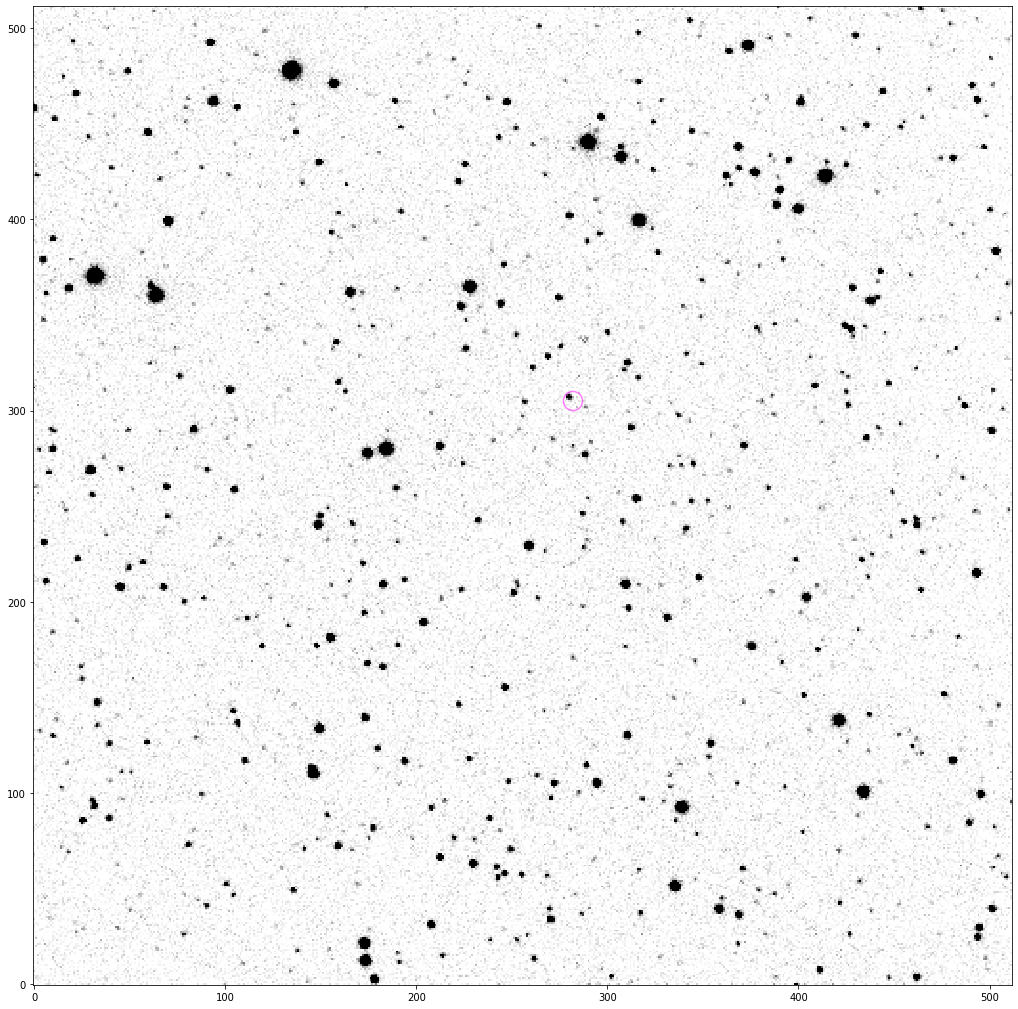

In [157]:
fig, ax = plt.subplots(1,1, figsize = (18,18))#plt.figure()
#plt.imshow(wolf, cmap='Greys', origin='lower', vmin=1000, vmax=10000)
ax.imshow(stars.data, cmap='Greys', origin='lower', vmin=0, vmax=100) 
apertures.plot(color='magenta', lw=1.5, alpha=0.5)

In [181]:
time = np.zeros(34) 
star_a = np.zeros(34) 
star_b = np.zeros(34) 
star_c = np.zeros(34)
star_d = np.zeros(34)
rzsge = np.zeros(34)
for n in range(34):
    image_n = ccdp.CCDData.read('rzsge/rzsge_' + str(n) + '.fits',unit='adu')
    aligned_image_n, footprint = aa.register(np.float64(image_n.data), np.float64(rz1.data))
    phot_table_a = aperture_photometry(aligned_image_n,apertures[0])
    phot_table_b = aperture_photometry(aligned_image_n,apertures[1])
    phot_table_c = aperture_photometry(aligned_image_n,apertures[2])
    phot_table_d = aperture_photometry(aligned_image_n,apertures[3])
    phot_table_sge = aperture_photometry(aligned_image_n,apertures[4])
    star_a[n] = phot_table_a['aperture_sum'][0]
    star_b[n] = phot_table_b['aperture_sum'][0] 
    star_c[n] = phot_table_c['aperture_sum'][0] 
    star_d[n] = phot_table_d['aperture_sum'][0] 
    rzsge[n] = phot_table_sge['aperture_sum'][0]
    time[n] = image_n.header['MJD']
    
#print(time) 
#print(star_a) 
#print(star_b) 
#print(star_c)
#print(star_d)
#print(rzsge)

INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader inste

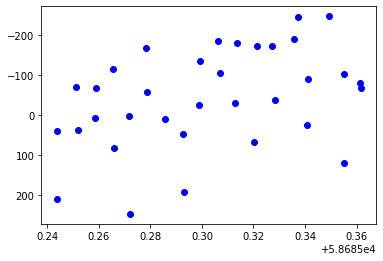

In [182]:
avg_stars = np.zeros(34) 
rzsge_cal = np.zeros(34)
for n in range(34):
    #time
    avg_stars[n] = (star_a[n] + star_b[n] + star_c[n] + star_d[n]) / 420 
    rzsge_cal[n] = rzsge[n] / avg_stars[n]
    
sa = 0
sb = 0
sc = 0
sd = 0
sr = np.zeros(34)

for n in range(34): 
    #time
    sa = star_a[n]/star_a[0]
    sb = star_b[n]/star_b[0]
    sc = star_c[n]/star_c[0]
    sd = star_d[n]/star_d[0]
    correction = (sa+sb+sc+sd)/4 
    sr[n] = rzsge[n] / correction
plt.plot(time,sr,'bo') 
plt.gca().invert_yaxis()

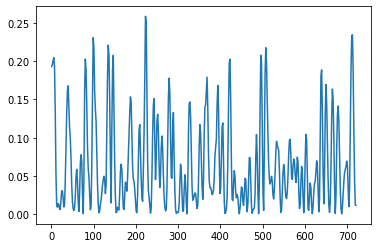

In [183]:
freq, power = LombScargle(time,sr).autopower()
per = 1/freq[np.argmax(power)]
plt.plot(freq,power)

About 630 days per cycle